# Unsupervised Analysis of Days of Week

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

In [2]:
from jupyterworkflow.data import get_data
data = get_data()

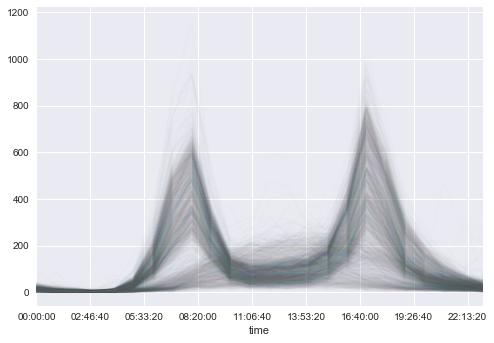

In [3]:
pivoted = data.pivot_table('Total', index= data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Pinciple Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(1855, 24)

In [10]:
X2 = PCA(2, svd_solver="full").fit_transform(X)
X2.shape

(1855, 2)

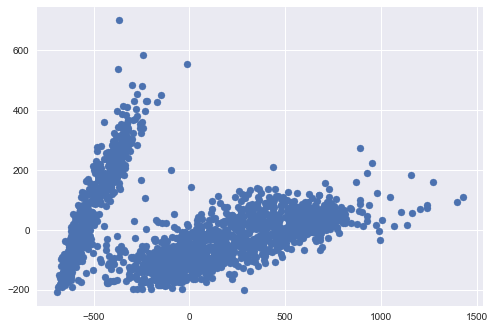

In [12]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsuprvised Clustering

In [13]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 1, 1])

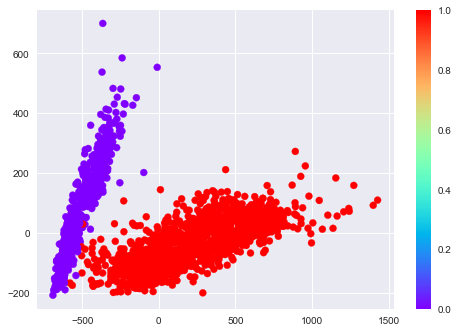

In [16]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

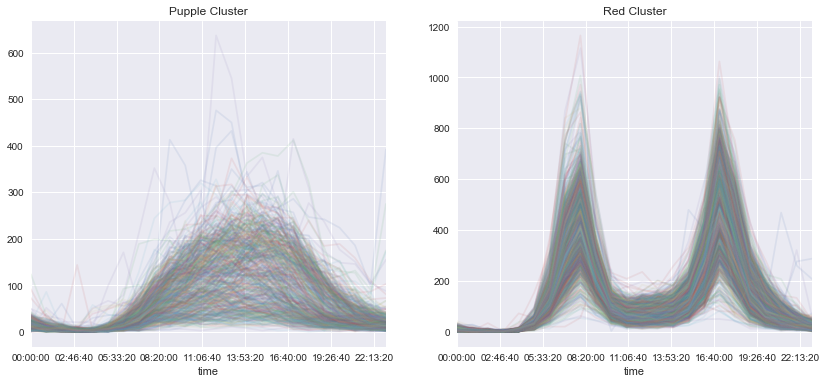

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Pupple Cluster')
ax[1].set_title('Red Cluster');

### Comparing with Days of Week

In [17]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

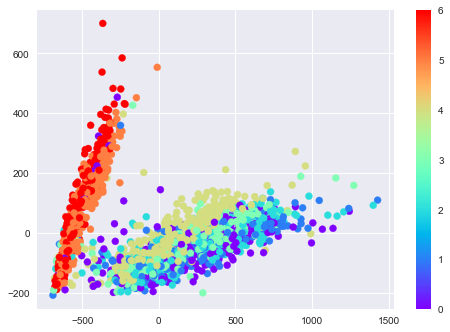

In [18]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliners
The following points are weekdays with a holiday-like pattern

In [19]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-10-18', '2017-10-19', '2017-10-20', '2017-10-23',
               '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
               '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', length=1281, freq=None)

What's up with Feb 6, 2017? [Snow Storm](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)